In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import matplotlib.pyplot as plt

In [2]:
dataset = load_iris()
print(dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
X = dataset["data"]
y = dataset["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [5]:
normalizer = StandardScaler()
normalizer.fit(X_train)

StandardScaler()

In [6]:
X_train_norm = normalizer.transform(X_train)

In [7]:
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

In [8]:
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
datas = DataLoader(train_ds, batch_size = 2, shuffle = True)

In [9]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(in_features = input_size, out_features = hidden_size)
        self.layer2 = nn.Linear(in_features = hidden_size, out_features = output_size)

    def forward(self, x):
        y = self.layer1(x)
        y = nn.Sigmoid()(y)
        y = self.layer2(y)
        y = nn.Softmax(dim = 1)(y)
        return y

In [10]:
input_size = X_train.shape[1]
hidden_size = 16
output_size = 3
model = Model( input_size, hidden_size, output_size)

In [11]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), learning_rate)

In [12]:
epochs = 100
loss_hist = [0] * epochs
accuracy_hist =[0] * epochs
for epoch in range(epochs):
    for X_batch, y_batch in datas:
        pred = model.forward(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()

    loss_hist[epoch] /= len(datas.dataset)
    accuracy_hist[epoch] /= len(datas.dataset)

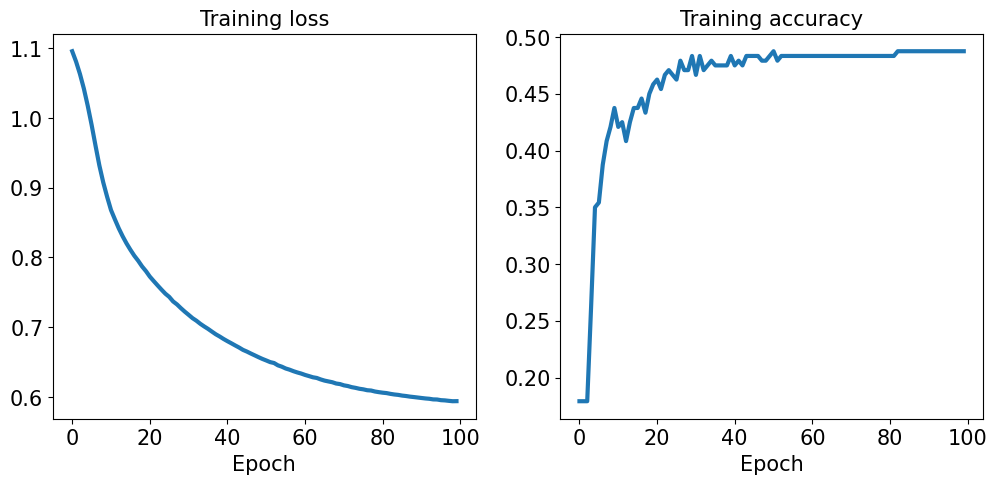

In [13]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [14]:
X_test = normalizer.transform(X_test)
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
pred = model(X_test)
is_correct = (torch.argmax(pred, dim=1) == y_test).float()
accuarcy = is_correct.mean()

In [15]:
print(accuarcy)

tensor(0.9333)


In [16]:
torch.save(model, "iris_classifier/iris_classifier.pt")

In [17]:
model_new = torch.load("iris_classifier/iris_classifier.pt", weights_only = False)

In [18]:
#save paramnets only
torch.save(model.state_dict(), "iris_classifier/iris_classifier_state.pt")

In [19]:
new_model = Model(input_size, hidden_size, output_size)
new_model.load_state_dict(torch.load("iris_classifier/iris_classifier_state.pt"))

<All keys matched successfully>